<a href="https://colab.research.google.com/github/delphi12/VirtualAssistant_Assignment2/blob/main/Algorithms/Algorithm2_Jaccard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from nltk.metrics import jaccard_distance
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
df_train = pd.read_csv('./DataFiles/train_01.csv')
df_dev = pd.read_csv('./DataFiles/dev_01.csv')
df_test = pd.read_csv('./DataFiles/test_01.csv')

In [3]:
#Jaccard distance for training data
jaccard_dis = []

for i in range(0,(len(df_train)-1)):
    s1 = str(df_train['Sent_1'][i])
    s2 = str(df_train['Sent_2'][i])

    # transfer to TF Matrix
    cv = CountVectorizer(tokenizer=lambda s: s.split())
    corpus = [s1, s2]
    vectors = cv.fit_transform(corpus).toarray()
    # disjuction
    numerator = np.sum(np.min(vectors, axis=0))
    # conjuction
    denominator = np.sum(np.max(vectors, axis=0))
    # jaccard distance
    jaccard_dis.append(1.0 * numerator / denominator)
  
print(jaccard_dis)

[0.2777777777777778, 0.4666666666666667, 0.4166666666666667, 0.38461538461538464, 0.35714285714285715, 0.2857142857142857, 0.3076923076923077, 0.5833333333333334, 0.26666666666666666, 0.35714285714285715, 0.42857142857142855, 0.36363636363636365, 0.5454545454545454, 0.42857142857142855, 0.26666666666666666, 0.45454545454545453, 0.5454545454545454, 0.375, 0.6666666666666666, 0.45454545454545453, 0.36363636363636365, 0.6153846153846154, 0.5714285714285714, 0.3333333333333333, 0.23076923076923078, 0.3333333333333333, 0.5, 0.23076923076923078, 0.26666666666666666, 0.5454545454545454, 0.4, 0.5, 0.25, 0.3125, 0.45454545454545453, 0.5, 0.46153846153846156, 0.4, 0.46153846153846156, 0.45454545454545453, 0.6, 0.2727272727272727, 0.5384615384615384, 0.5, 0.42857142857142855, 0.4117647058823529, 0.45454545454545453, 0.5, 0.2857142857142857, 0.36363636363636365, 0.6, 0.25, 0.2727272727272727, 0.375, 1.0, 0.35714285714285715, 0.5, 0.5, 0.3076923076923077, 0.25, 0.23076923076923078, 0.29411764705882

In [4]:
# Preparing training data
train_data = pd.concat([df_train['Topic_Id'],pd.DataFrame(jaccard_dis),df_train['Label']],axis=1)
train_data.columns = ['Topic_Id','distance','Label']

if(train_data.isna().sum().sum()) > 0:
    #Drop NaN values
    train_data = train_data.dropna()

# Write the training data to csv file
train_data.to_csv("./DataFiles/train_data_alg2.csv",index=0)


In [5]:
# Calculating Jaccard distance for dev data
jaccard_dis_dev = []
#print(len(df_dev_01)-1)

for i in range(0,(len(df_dev)-1)):
    s1 = str(df_dev['Sent_1'][i])
    s2 = str(df_dev['Sent_2'][i])
    # transfer to TF Matrix
    cv = CountVectorizer(tokenizer=lambda s: s.split())
    corpus = [s1, s2]
    vectors = cv.fit_transform(corpus).toarray()
    # disjuction
    numerator = np.sum(np.min(vectors, axis=0))
    # conjuction
    denominator = np.sum(np.max(vectors, axis=0))
    # jaccard distance
    jaccard_dis_dev.append(1.0 * numerator / denominator)
    
print(jaccard_dis_dev)


[0.2777777777777778, 0.5, 0.3333333333333333, 0.35714285714285715, 0.29411764705882354, 0.35714285714285715, 0.35294117647058826, 0.22727272727272727, 0.3333333333333333, 0.35714285714285715, 0.4117647058823529, 0.2777777777777778, 0.3888888888888889, 0.375, 0.17391304347826086, 0.35714285714285715, 0.5, 0.3, 0.2727272727272727, 0.23076923076923078, 0.2, 0.2727272727272727, 0.18181818181818182, 0.16666666666666666, 0.3333333333333333, 0.2, 0.17647058823529413, 0.5, 0.13333333333333333, 0.17647058823529413, 0.16666666666666666, 0.14285714285714285, 0.26666666666666666, 0.13333333333333333, 0.35714285714285715, 0.07692307692307693, 0.1111111111111111, 0.1111111111111111, 0.16666666666666666, 0.15384615384615385, 0.1111111111111111, 0.08333333333333333, 0.05555555555555555, 0.14285714285714285, 0.08333333333333333, 1.0, 0.08333333333333333, 0.15384615384615385, 0.07142857142857142, 0.07692307692307693, 0.1, 0.08333333333333333, 0.1, 0.09090909090909091, 0.16666666666666666, 0.1, 0.0714285

In [6]:
# Prepearing dev data 
dev_data = pd.concat([df_dev['Topic_Id'],pd.DataFrame(jaccard_dis_dev),df_dev['Label']],axis=1)
dev_data.columns = ['Topic_Id','distance','Label']

if(dev_data.isna().sum().sum()) > 0:
    #drop NaN values
    dev_data = dev_data.dropna()

# write the dev data to csv file
dev_data.to_csv("./DataFiles/dev_data_alg2.csv",index=0)

In [7]:
# Calculating Jaccard distance for test data
jaccard_dis_test = []
#print(len(df_test_01)-1)

for i in range(0,(len(df_test)-1)):
    s1 = str(df_test['Sent_1'][i])
    s2 = str(df_test['Sent_2'][i])
    # transfer to TF Matrix
    cv = CountVectorizer(tokenizer=lambda s: s.split())
    corpus = [s1, s2]
    vectors = cv.fit_transform(corpus).toarray()
    # disjuction
    numerator = np.sum(np.min(vectors, axis=0))
    # conjuction
    denominator = np.sum(np.max(vectors, axis=0))
    # jaccard distance
    jaccard_dis_test.append(1.0 * numerator / denominator)
print(jaccard_dis_test)

[0.2, 0.17647058823529413, 0.19047619047619047, 0.16, 0.15, 0.1875, 0.13333333333333333, 0.17647058823529413, 0.2857142857142857, 0.16666666666666666, 0.14285714285714285, 0.14285714285714285, 0.09523809523809523, 0.18181818181818182, 0.23076923076923078, 0.2857142857142857, 0.16666666666666666, 0.3, 0.1, 0.2857142857142857, 0.38461538461538464, 0.15789473684210525, 0.16666666666666666, 0.2, 0.2222222222222222, 0.26666666666666666, 0.1, 0.15384615384615385, 0.25, 0.13333333333333333, 0.21428571428571427, 0.23076923076923078, 0.2, 0.23076923076923078, 0.16666666666666666, 0.3076923076923077, 0.1875, 0.15, 0.14285714285714285, 0.11764705882352941, 0.5, 0.1875, 0.16666666666666666, 0.06666666666666667, 0.15, 0.1, 0.07692307692307693, 0.07692307692307693, 0.07142857142857142, 0.21428571428571427, 0.1, 0.1, 0.1111111111111111, 0.13333333333333333, 0.07692307692307693, 0.0, 0.1111111111111111, 0.09090909090909091, 0.10526315789473684, 0.2, 0.07142857142857142, 0.07142857142857142, 0.04761904

In [8]:
# Preparing test data
test_data = pd.concat([df_test['Topic_Id'],pd.DataFrame(jaccard_dis_test),df_test['Label']],axis=1)
test_data.columns = ['Topic_Id','distance','Label']

if(test_data.isna().sum().sum()) > 0:
    #drop NaN values
    test_data = test_data.dropna()

# write the test data to csv file
test_data.to_csv("./DataFiles/test_data_alg2.csv",index=0)

# Algorithm 2 - Training and testing

In [9]:
# train data_X, train_data_y
train_data_y = train_data['Label']
train_data_X = train_data.copy()
train_data_X.drop(['Label'],axis=1,inplace=True)

In [10]:
# dev_data_X, dev_data_y
dev_data_y = dev_data['Label']
dev_data_X = dev_data.copy()
dev_data_X.drop(['Label'],axis=1,inplace=True)

In [11]:
# test_data_X, test_data_y
test_data_y = test_data['Label']
test_data_X = test_data.copy()
test_data_X.drop(['Label'], axis=1, inplace=True)

In [12]:
# training the model with DecisionTreeClassifier
clf_tree = tree.DecisionTreeClassifier(criterion="entropy")
clf_tree = clf_tree.fit(train_data_X,train_data_y)
score_tree = clf_tree.score(dev_data_X, dev_data_y)
print("\n score_tree:",score_tree)
print("\n")


 score_tree: 0.6923448442405216




In [13]:
dev_y_pred = clf_tree.predict(dev_data_X)
dev_y_true = dev_data_y
f1 = f1_score(dev_y_true,dev_y_pred)
print("f1_score:",f1)
print("\n")


f1_score: 0.49842519685039366




In [14]:
print(classification_report(dev_y_true,dev_y_pred))


              precision    recall  f1-score   support

           0       0.73      0.84      0.78      2671
           1       0.59      0.43      0.50      1470

    accuracy                           0.69      4141
   macro avg       0.66      0.63      0.64      4141
weighted avg       0.68      0.69      0.68      4141



In [15]:
# test
test_y_pred = clf_tree.predict(test_data_X)
test_y_true = test_data_y
f1_test = f1_score(test_y_true,test_y_pred)
print("\n f1_score_test:",f1_test)
print("\n test:")
print(classification_report(test_y_true, test_y_pred))


 f1_score_test: 0.38582677165354334

 test:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       662
           1       0.62      0.28      0.39       175

    accuracy                           0.81       837
   macro avg       0.73      0.62      0.64       837
weighted avg       0.79      0.81      0.78       837



In [16]:
accuracy_score(test_y_true, test_y_pred)

0.8136200716845878

In [18]:
precision_score(test_y_true, test_y_pred)

0.620253164556962

In [19]:
recall_score(test_y_true, test_y_pred)

0.28

In [24]:
print(test_y_true)

0      0
1      0
2      0
3      0
4      1
      ..
832    0
833    0
834    0
835    0
836    0
Name: Label, Length: 837, dtype: int64


In [35]:
test_y_true.to_numpy()

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
print(test_y_pred)

[0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1
 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

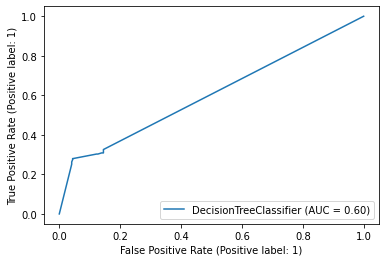

In [39]:
from sklearn.metrics import RocCurveDisplay
roc_disp = RocCurveDisplay.from_estimator(clf_tree, test_data_X, test_data_y)